In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import ast
from mgua import *
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import random as rnd

In [33]:
tab = pd.read_csv("data_varvara/cox2/cox2_matrix_alphabet_NN***_UpTo4chains.csv")

In [34]:
tab.head()

,Br***C***C***C***,Br***C***C***N***,Br***C***C***O***,Br***C***C***S***,Br***C***S***C***,C***C***C***C***,C***C***C***Cl***,C***C***C***F***,C***C***C***N***,C***C***C***O***,...,F***C***C***S***,F***C***S***O***,N***C***C***N***,N***C***C***O***,N***C***C***S***,N***N***C***O***,N***O***C***O***,O***C***C***O***,O***C***C***S***,S***C***C***S***
0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,2.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,18.0,0.0,2.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,18.0,0.0,2.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,21.0,0.0,6.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
y = pd.read_csv("data_varvara/cox2/cox2_y.csv")

In [36]:
y = np.array(y)

In [37]:
r = []
for i in y:
    s = i[0]
    s = re.sub('inf', '1_000_000_000', str(s))
    r.append(ast.literal_eval(s))
    

In [38]:
y = np.array(r)
for i in range(y.shape[0]):
    if y[i,1] == 1_000_000_000:
        y[i,1] = np.inf
    

In [39]:
X = np.array(tab)


In [40]:
corr_coef = [0.8, 0.7, 0.6]
num_selec = [15]
buf_size = 20

In [41]:
# for cor in corr_coef:
#     for num_s in num_selec:
#         mdl = MGUA(buf_size, num_s, cor)
#         mdl.fit(X, y[:,0])
#         print(mdl.get_indexes())
#         print()
        

In [42]:
# for train_index, test_index in KFold(n_splits=5).split(X):
#     X_train = X[train_index, :]
#     X_test = X[test_index, :]
    
#     y_train = y[train_index, 0]
#     y_test = y[test_index, 0]
    
#     mdl = Ridge(alpha=0.1)
#     mdl.fit(X_train, y_train)
#     print(mdl.score(X_test, y_test))

In [43]:
rnd.seed(40)

In [44]:
tsne = TSNE()


In [45]:
ar = tsne.fit_transform(X)

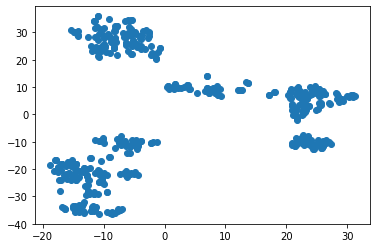

In [46]:
plt.scatter(ar[:,0],ar[:,1])

In [65]:
num_clust = 7

In [66]:
clust = AgglomerativeClustering(num_clust)

In [67]:
cluster_struct = clust.fit_predict(ar)

In [68]:
color = ["#"+''.join([rnd.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(num_clust)]

In [69]:
colors = []
for i in cluster_struct:
    colors.append(color[i])

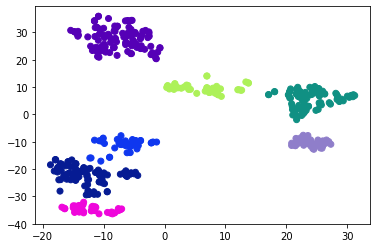

In [70]:
plt.scatter(ar[:,0],ar[:,1], color=colors)